<a href="https://colab.research.google.com/github/chikabella24/Capstone-Project-on-Classification-Model/blob/main/Copy_of_Classification_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st

In [114]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [25]:
# reading the dataset in csv 
df = pd.read_csv("/content/water_potability.csv")

In [26]:
# to get the first five rows
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [27]:
# to get the first 12 rows 
df.head(12)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


In [12]:
#  Getting the last 3000 rows
df.tail(3000)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
276,7.082301,169.468927,29846.719057,5.443387,350.401849,353.030380,18.959534,30.389096,3.485577,1
277,5.334184,224.787936,28897.491527,6.048525,NaN,360.179177,12.247344,67.154751,5.091357,1
278,10.761898,81.710895,25999.953669,8.477394,318.427241,392.704082,12.716350,52.246972,4.661799,1
279,6.286807,258.300052,13777.376191,7.483258,328.680650,563.434775,16.460837,73.516654,4.104863,1
280,9.794559,129.870958,20682.731742,9.390843,291.980083,427.123948,11.853228,78.711469,2.945419,1
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [13]:
# to determine the shape of the data ie the number of rows and columns
df.shape

(3276, 10)

In [17]:
# to know the information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [18]:
# to know the null values present in the dataset
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [20]:
# to get the statistical info about the dataset
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [23]:
# using loc to get the first two rows and columns 
df.loc[[0,1]]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.036752,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


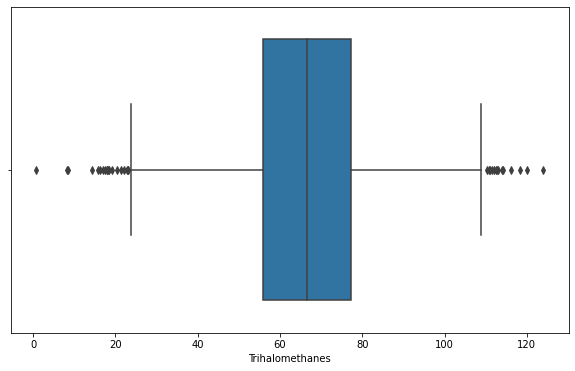

In [36]:
# to  determine if there are outliers and to know the best imput method to fillna
fig,ax = plt.subplots(figsize =(10,6) )
sns.boxplot(df.Trihalomethanes)

In [32]:
# using loc to get the three columns with the missing values
df.loc[[0,1],('ph','Sulfate','Trihalomethanes')]

,ph,Sulfate,Trihalomethanes
0,NaN,368.516441,86.990970
1,3.71608,NaN,56.329076


In [33]:
# to access  the ph column and getting the first 12 values from the column
df['ph'].head(12)

0           NaN
1      3.716080
2      8.099124
3      8.316766
4      9.092223
5      5.584087
6     10.223862
7      8.635849
8           NaN
9     11.180284
10     7.360640
11     7.974522
Name: ph, dtype: float64

In [34]:
# to access the Sulfate column and the values 
df['Sulfate']

0       368.516441
1              NaN
2              NaN
3       356.886136
4       310.135738
           ...    
3271    359.948574
3272           NaN
3273           NaN
3274           NaN
3275           NaN
Name: Sulfate, Length: 3276, dtype: float64

In [35]:
# to access the Sulfate column and the values 
df['Trihalomethanes']

0        86.990970
1        56.329076
2        66.420093
3       100.341674
4        31.997993
           ...    
3271     66.687695
3272           NaN
3273     69.845400
3274     77.488213
3275     78.698446
Name: Trihalomethanes, Length: 3276, dtype: float64

In [37]:
Data_Copy = df.copy()

In [38]:
# using the median value from the statistical description to fill na the missing values for
# the specific column ph
Data_Copy['ph'].fillna(Data_Copy['ph'].median(),inplace = True)

In [39]:
# check for NaN values in that specific column
Data_Copy.isnull().sum()

ph                   0
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [40]:
Data_Copy.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.036752,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [59]:
#using the mean value from the statistical description to fill na the missing values for
# the specific column 'Sulfate'
Data_Copy['Sulfate'].fillna(Data_Copy['Sulfate'].median(),inplace = True)

In [60]:
Data_Copy.isnull().sum()

ph                   0
Hardness             0
Solids               0
Chloramines          0
Sulfate              0
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [61]:
Data_Copy.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.036752,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [75]:
#using the mode value from the statistical description to fill na the missing values for
# the specific column Trihalomethanes
Data_Copy['Trihalomethanes'].fillna(Data_Copy['Trihalomethanes'].median(),inplace = True)

In [77]:

#checking for Nan values
Data_Copy.isnull().sum()


ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [81]:
Data_Copy.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.036752,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [80]:
Data_Copy.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.074194,196.369496,22014.092526,7.122277,333.608364,426.205111,14.284970,66.407478,3.966786,0.390110
std,1.470040,32.879761,8768.570828,1.583085,36.143851,80.824064,3.308162,15.769958,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


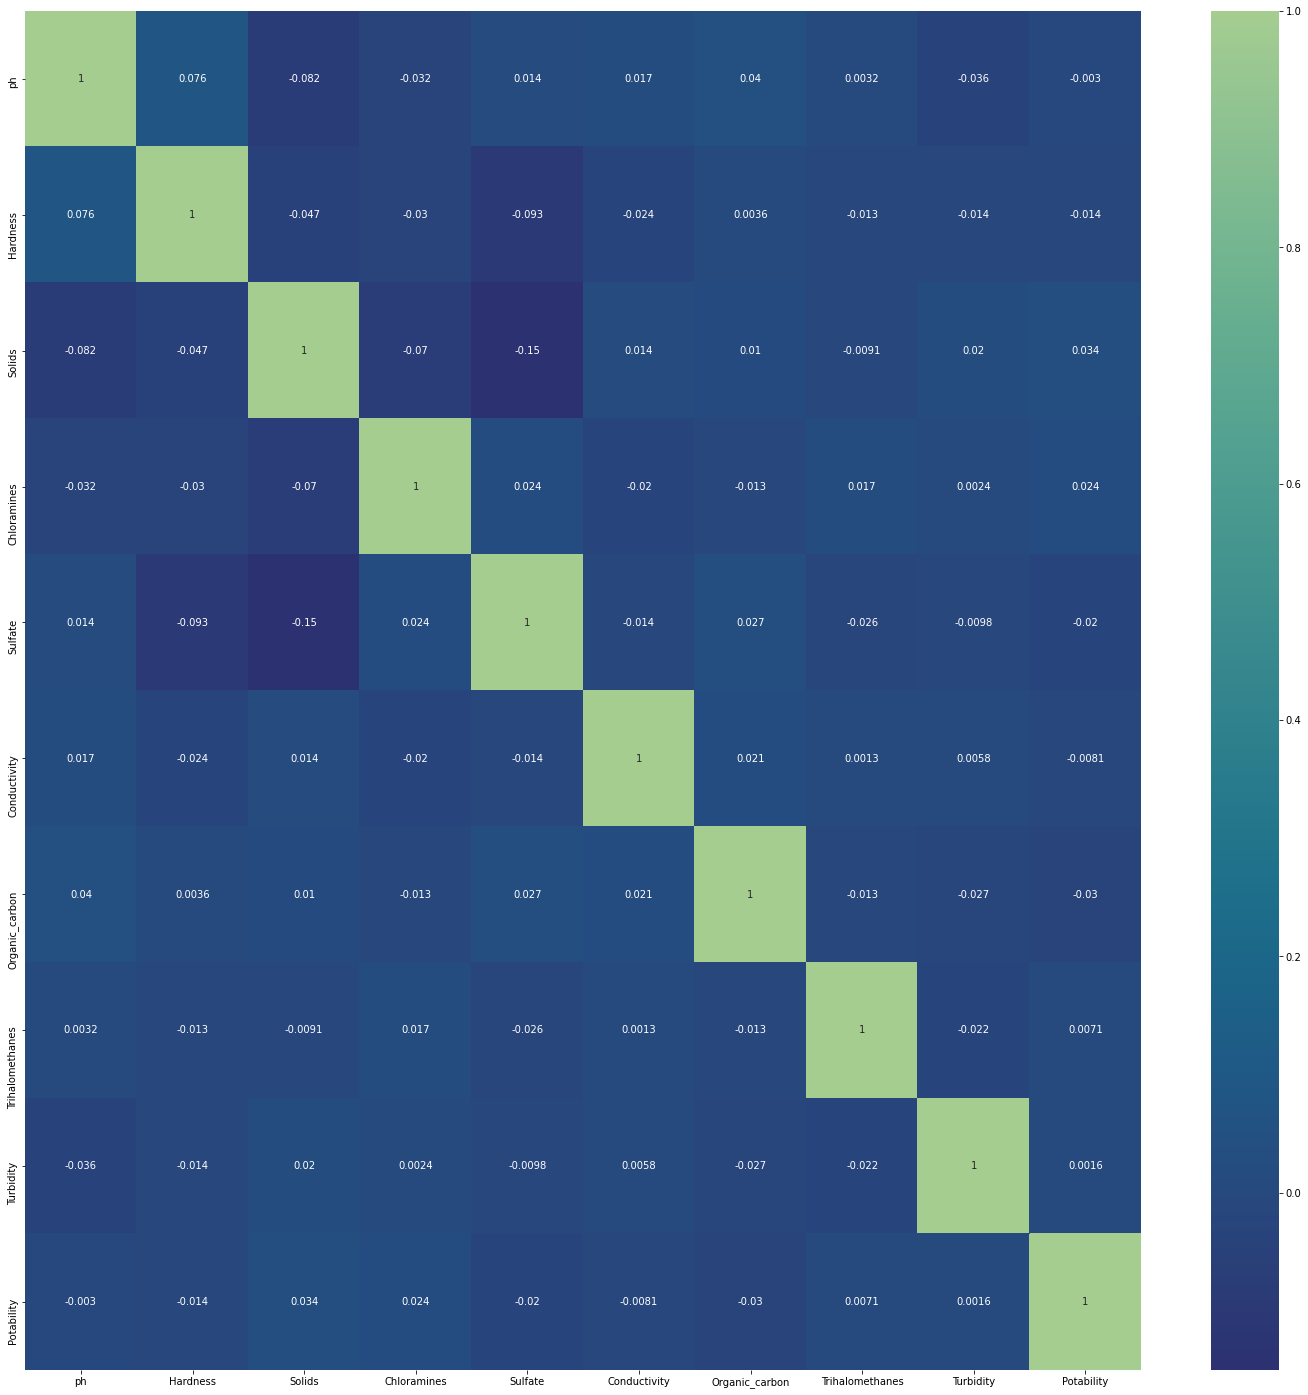

In [47]:
corr = Data_Copy.corr()
corr_feat = corr.index
plt.figure(figsize = (25,25))
# plot heat map
viz =sns.heatmap(Data_Copy[corr_feat].corr(),annot = True,cmap = 'crest_r')

In [22]:
#This is a correlation table that shows correlated features. If the values are close to 1, that means is there is a postive correlation.
#If the values are close to -1, that means that there is a negative correlation,
#If it is zero then there no correlation¶

In [66]:
y= Data_Copy.Potability.values # convert values to numpy array
x_data = Data_Copy.drop(['Potability'],axis = 1)# except for potability the other columns are our x_data

In [ ]:
#The y axis contains the potability values while the x_data stores the columns with the exception of potabililty column

In [67]:
x = (x_data-np.min(x_data))/np.max(x_data)-np.min(x_data).values

In [83]:
# train test split
from sklearn.model_selection import train_test_split # library from skilearn that splits dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 4)
print("x_train",x_train.shape)
print("x_test",x_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

x_train (2293, 9)
x_test (983, 9)
y_train (2293,)
y_test (983,)


In [ ]:
#Spliting dataset
#Before a model is built the dataset is split into tranining and test data.The train data is/
#what is used to train the data and the test data is used to determine the performance of the
#model in prediction. You do not use the test data to train the model as it will cause data leakage and inaccuracy of model.

In [ ]:
 #x_train is the tranning data
# y_train is the set of labels to all the data in x_train
# x_test  is the test data set
# y_test  is the set of labels to all data in the x_test
# test_size is the percentage that the dataset is split.In this case 0.3 is 30% which means the dataset was split into 70% for trainning and 30% for testing
# random_state is used for initializing  the internal number generator which will decide splitting of data into train and test indices.
# in this case random state is 4

In [85]:
from sklearn.linear_model import LogisticRegression #importing the alogoritim for trainning your model
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,recall_score,f1_score
# measure the accuracy of the model on the test set
# measure the accuracy of the model on the test set
# to measure the number of true postive,false postive,true negative,false negat # to measure the score of predictive value to actual value
# to measure the proportion of actual value to predictive postive value
# to measure the harmonic mean of the precision and recall

In [86]:
model = LogisticRegression() # intializing the model
model.fit(x_train,y_train)# fitting the model
y_pred = model.predict(x_test) # prediction

In [70]:
#confusion metrics

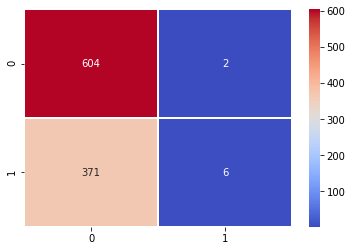

In [88]:
cm = confusion_matrix(y_test,y_pred)
viz = sns.heatmap(cm,annot= True,cmap ='coolwarm',linewidth =1,fmt ='d')
plt.show()

In [89]:
# Accuracy Score
accuracy_score(y_test,y_pred)

0.6205493387589013

In [90]:
# Precision Score
precision_score(y_test, y_pred)

0.75

In [91]:
# Recall Score
recall_score(y_test,y_pred)

0.015915119363395226

In [92]:
# f1 Score
f1_score(y_test,y_pred)

0.031168831168831172

In [ ]:
# DATA VISUALIZATION

0    1998
1    1278
Name: Potability, dtype: int64


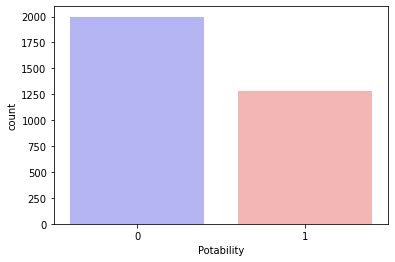

In [95]:
# count plot checking for  water Potability
# where 1 is potability
# where 0 is non-potability
print(df.Potability.value_counts())
sns.countplot(x ='Potability',data = df,palette="bwr")
plt.show()

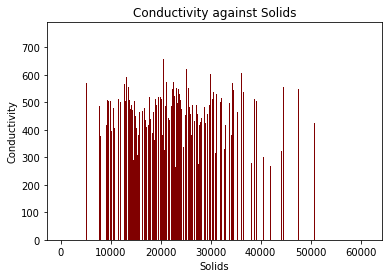

In [104]:
#using barplot 
 
plt.bar(Data_Copy.Solids, Data_Copy.Conductivity, color ='maroon',width = 10 )
plt.title('Conductivity against Solids')
plt.ylabel('Conductivity')
plt.xlabel('Solids')
plt.show()

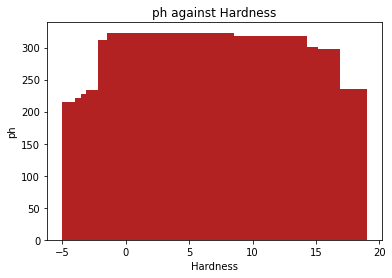

In [107]:
plt.bar(Data_Copy.ph, Data_Copy.Hardness, color ='firebrick',width = 10 )
plt.title('ph against Hardness')
plt.ylabel('ph')
plt.xlabel('Hardness')
plt.show()

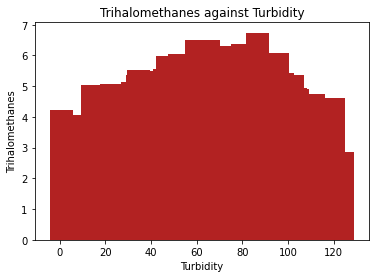

In [106]:
plt.bar(Data_Copy.Trihalomethanes, Data_Copy.Turbidity, color ='firebrick',width = 10 )
plt.title('Trihalomethanes against Turbidity' )
plt.ylabel('Trihalomethanes')
plt.xlabel('Turbidity')
plt.show()

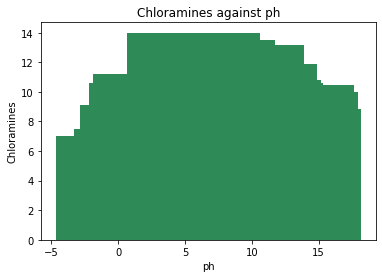

In [108]:
plt.bar(Data_Copy.Chloramines, Data_Copy.ph, color ='seagreen' ,width = 10 )
plt.title('Chloramines against ph' )
plt.ylabel('Chloramines')
plt.xlabel('ph')
plt.show()

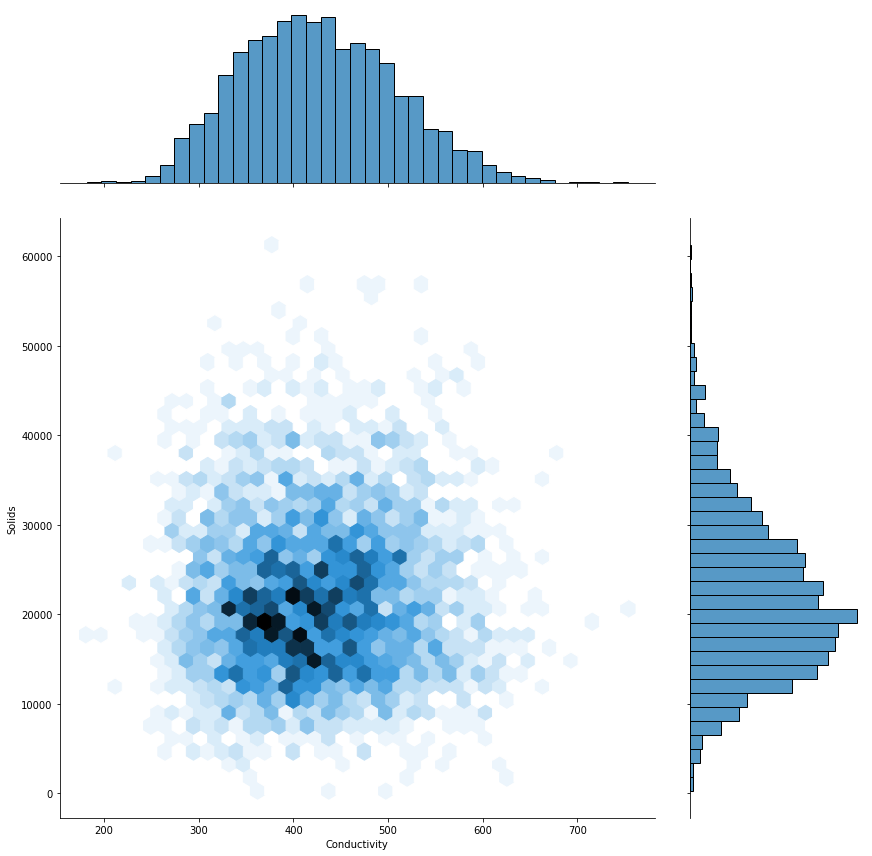

In [ ]:
#histogram
 
waterplot = sns.jointplot(x= "Conductivity", y= "Solids", kind= "hex", palette= "bright", height=12, ratio=3, data=df)
 
plt.show()

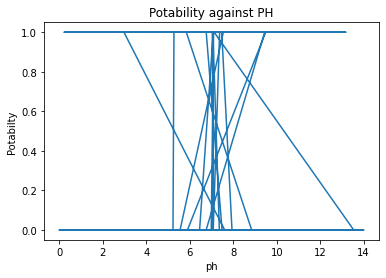

In [ ]:
plt.plot(df.ph, df.Potability)
plt.title('Potability against PH')
plt.ylabel('Potabilty')
plt.xlabel('ph')
plt.show()

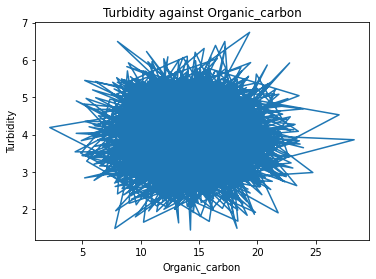

In [ ]:
plt.plot(df.Organic_carbon, df.Turbidity)
plt.title('Turbidity against Organic_carbon')
plt.ylabel('Turbidity')
plt.xlabel('Organic_carbon')
plt.show()

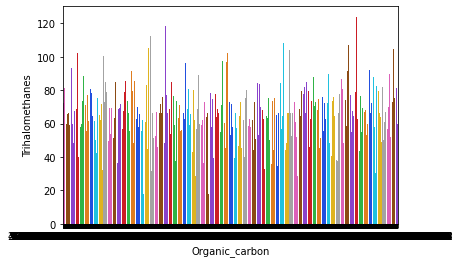

In [ ]:
sns.barplot(x= "Organic_carbon", y= "Trihalomethanes", data=df, palette="bright")

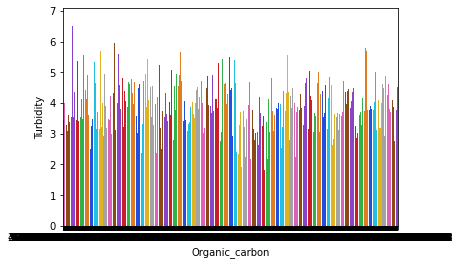

In [ ]:
 sns.barplot(x= "Organic_carbon", y= "Turbidity", data=df, palette="bright")

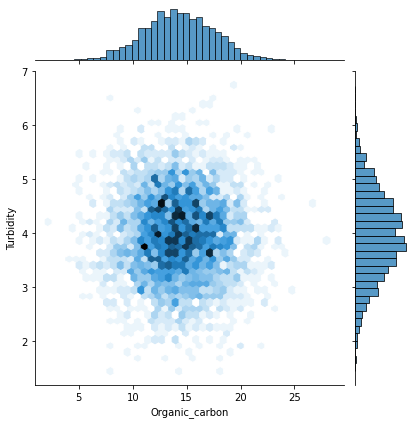

In [ ]:
 sns.jointplot(x= "Organic_carbon", y= "Turbidity", data=df, palette="bright", kind = "hex")

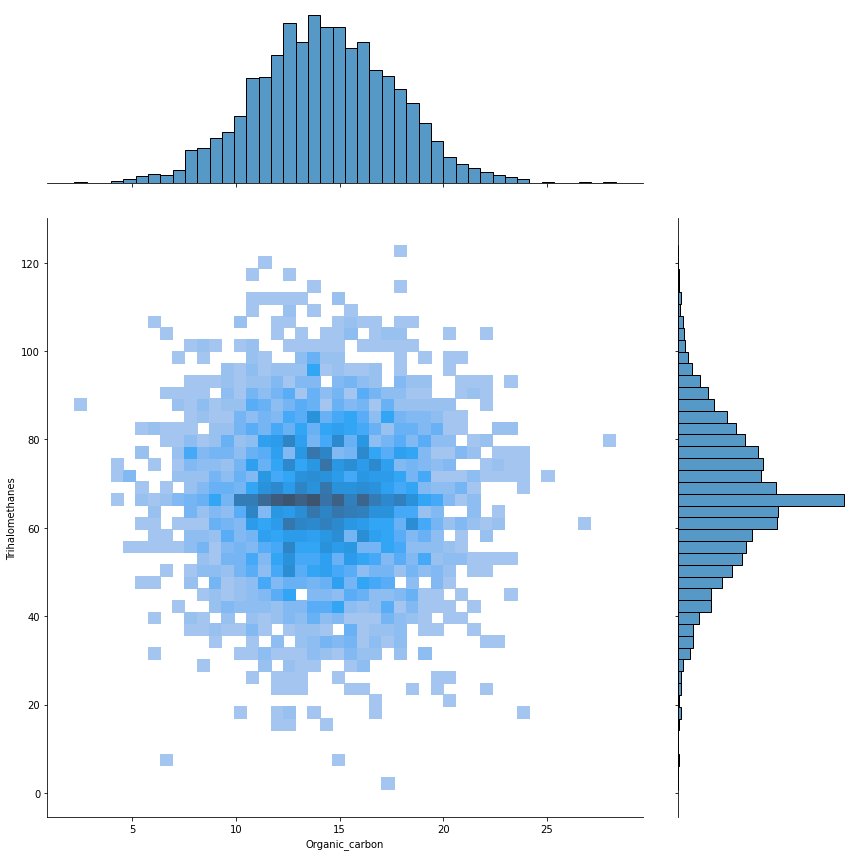

In [ ]:
#histogram
 
waterplot = sns.jointplot(x= "Organic_carbon", y= "Trihalomethanes", kind= "hist", palette= "bright", height=12, ratio=3, data=df)
 
plt.show()

In [109]:
# change the column names to P_data
Data_Copy.columns = {'ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon', 
                     'Trihalomethanes','Turbidity','Potability'}
                    
                                

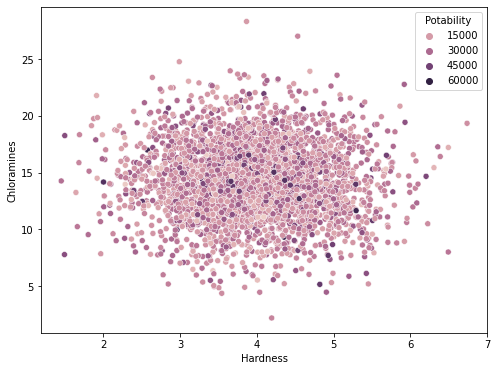

In [110]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Hardness',y='Chloramines',data=Data_Copy,hue='Potability')
plt.show()

(array([  1.,   0.,   2.,   0.,   0.,   3.,   7.,   2.,   8.,   7.,  11.,
         28.,  34.,  34.,  47.,  73.,  73.,  97., 119., 142., 151., 164.,
        219., 221., 368., 218., 184., 188., 177., 148., 128., 110.,  80.,
         68.,  49.,  31.,  22.,  17.,  15.,  12.,   5.,   7.,   2.,   2.,
          1.,   1.]),
 array([  0.738     ,   3.4176087 ,   6.09721739,   8.77682609,
         11.45643478,  14.13604348,  16.81565217,  19.49526087,
         22.17486957,  24.85447826,  27.53408696,  30.21369565,
         32.89330435,  35.57291304,  38.25252174,  40.93213043,
         43.61173913,  46.29134783,  48.97095652,  51.65056522,
         54.33017391,  57.00978261,  59.6893913 ,  62.369     ,
         65.0486087 ,  67.72821739,  70.40782609,  73.08743478,
         75.76704348,  78.44665217,  81.12626087,  83.80586957,
         86.48547826,  89.16508696,  91.84469565,  94.52430435,
         97.20391304,  99.88352174, 102.56313043, 105.24273913,
        107.92234783, 110.60195652, 113.28

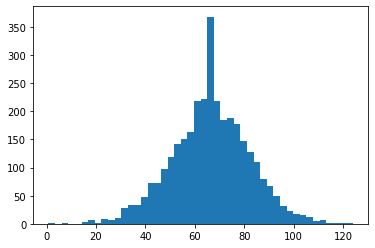

In [111]:
%matplotlib inline
plt.hist(Data_Copy['ph'],bins='auto')

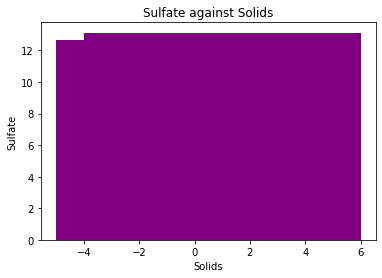

In [113]:
plt.bar(Data_Copy.Sulfate, Data_Copy.Solids, color ='purple' ,width = 10 )
plt.title('Sulfate against Solids' )
plt.ylabel('Sulfate')
plt.xlabel('Solids')
plt.show()